In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,bushjunior,bushsenior,carter,clinton,johnson,kennedy,nixon,obama,reagan,trump
aaron,0,0,0,2,0,0,0,0,0,0
abandon,1,0,1,0,0,1,0,0,0,0
abandoned,0,0,1,0,0,0,0,0,0,0
abandoning,0,0,0,0,0,0,1,0,0,0
abandonment,0,0,0,0,0,1,0,0,0,0


In [2]:
# Find the top 30 words said by each president
top_dict = {}
# For hver kolonne c, som er et præsidentnavn
for c in data.columns:
    # sorterer værdierne, og tager de 30 øverste
    top = data[c].sort_values(ascending=False).head(30)
    # i top_dict sættes key til præsidentnavn, og value til en liste af tuples med (ord, antal)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'bushjunior': [('america', 30),
  ('people', 29),
  ('congress', 27),
  ('new', 25),
  ('year', 24),
  ('iraq', 21),
  ('american', 19),
  ('nation', 18),
  ('help', 18),
  ('weve', 18),
  ('trust', 17),
  ('terrorists', 14),
  ('forces', 13),
  ('world', 13),
  ('future', 13),
  ('ask', 12),
  ('iraqi', 12),
  ('country', 12),
  ('empower', 11),
  ('past', 11),
  ('government', 11),
  ('americans', 11),
  ('years', 11),
  ('al', 11),
  ('come', 11),
  ('hope', 11),
  ('security', 10),
  ('good', 10),
  ('agreement', 10),
  ('citizens', 9)],
 'bushsenior': [('people', 26),
  ('know', 24),
  ('plan', 23),
  ('world', 22),
  ('right', 19),
  ('help', 18),
  ('american', 18),
  ('new', 17),
  ('country', 16),
  ('make', 15),
  ('congress', 14),
  ('health', 13),
  ('time', 13),
  ('good', 12),
  ('tax', 12),
  ('tell', 11),
  ('federal', 11),
  ('america', 10),
  ('government', 10),
  ('pay', 9),
  ('let', 9),
  ('economy', 9),
  ('year', 9),
  ('im', 9),
  ('things', 9),
  ('big', 8),
 

In [3]:
# Print the top 15 words said by each president
for president, top_words in top_dict.items():
    print(president)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

bushjunior
america, people, congress, new, year, iraq, american, nation, help, weve, trust, terrorists, forces, world
---
bushsenior
people, know, plan, world, right, help, american, new, country, make, congress, health, time, good
---
carter
soviet, world, peace, america, nations, union, states, military, united, security, people, oil, continue, nation
---
clinton
new, ask, people, make, years, help, children, america, thank, want, tonight, year, work, american
---
johnson
congress, years, year, think, believe, tonight, world, hope, peace, time, want, great, nations, nation
---
kennedy
world, nations, free, tax, defense, new, peace, year, years, alliance, need, billion, freedom, people
---
nixon
years, year, america, peace, world, new, people, congress, american, time, energy, states, great, make
---
obama
thats, people, america, just, world, work, american, new, want, make, years, change, year, economy
---
reagan
america, freedom, government, years, world, lets, budget, family, peopl

In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each president
words = []
for president in data.columns:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)
        
words

['america',
 'people',
 'congress',
 'new',
 'year',
 'iraq',
 'american',
 'nation',
 'help',
 'weve',
 'trust',
 'terrorists',
 'forces',
 'world',
 'future',
 'ask',
 'iraqi',
 'country',
 'empower',
 'past',
 'government',
 'americans',
 'years',
 'al',
 'come',
 'hope',
 'security',
 'good',
 'agreement',
 'citizens',
 'people',
 'know',
 'plan',
 'world',
 'right',
 'help',
 'american',
 'new',
 'country',
 'make',
 'congress',
 'health',
 'time',
 'good',
 'tax',
 'tell',
 'federal',
 'america',
 'government',
 'pay',
 'let',
 'economy',
 'year',
 'im',
 'things',
 'big',
 'tonight',
 'children',
 'reform',
 'work',
 'soviet',
 'world',
 'peace',
 'america',
 'nations',
 'union',
 'states',
 'military',
 'united',
 'security',
 'people',
 'oil',
 'continue',
 'nation',
 'energy',
 'power',
 'preserve',
 'time',
 'east',
 'afghanistan',
 'region',
 'meet',
 'help',
 'new',
 'middle',
 'congress',
 'forces',
 'national',
 'challenge',
 'clear',
 'new',
 'ask',
 'people',
 'make',


In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('world', 10),
 ('america', 9),
 ('people', 9),
 ('year', 9),
 ('american', 9),
 ('congress', 8),
 ('new', 8),
 ('years', 8),
 ('nation', 7),
 ('time', 7),
 ('country', 6),
 ('americans', 6),
 ('make', 6),
 ('help', 5),
 ('tonight', 5),
 ('work', 5),
 ('peace', 5),
 ('united', 5),
 ('just', 5),
 ('government', 4),
 ('security', 4),
 ('know', 4),
 ('nations', 4),
 ('states', 4),
 ('weve', 3),
 ('future', 3),
 ('tax', 3),
 ('federal', 3),
 ('let', 3),
 ('want', 3),
 ('need', 3),
 ('forces', 2),
 ('ask', 2),
 ('past', 2),
 ('come', 2),
 ('hope', 2),
 ('good', 2),
 ('agreement', 2),
 ('right', 2),
 ('health', 2),
 ('economy', 2),
 ('im', 2),
 ('children', 2),
 ('union', 2),
 ('energy', 2),
 ('national', 2),
 ('great', 2),
 ('president', 2),
 ('budget', 2),
 ('administration', 2),
 ('going', 2),
 ('free', 2),
 ('defense', 2),
 ('freedom', 2),
 ('today', 2),
 ('economic', 2),
 ('ago', 2),
 ('americas', 2),
 ('like', 2),
 ('iraq', 1),
 ('trust', 1),
 ('terrorists', 1),
 ('iraqi', 1),
 ('empo

In [6]:
# If more than half of the presidents have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 5]
add_stop_words

['world',
 'america',
 'people',
 'year',
 'american',
 'congress',
 'new',
 'years',
 'nation',
 'time',
 'country',
 'americans',
 'make']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

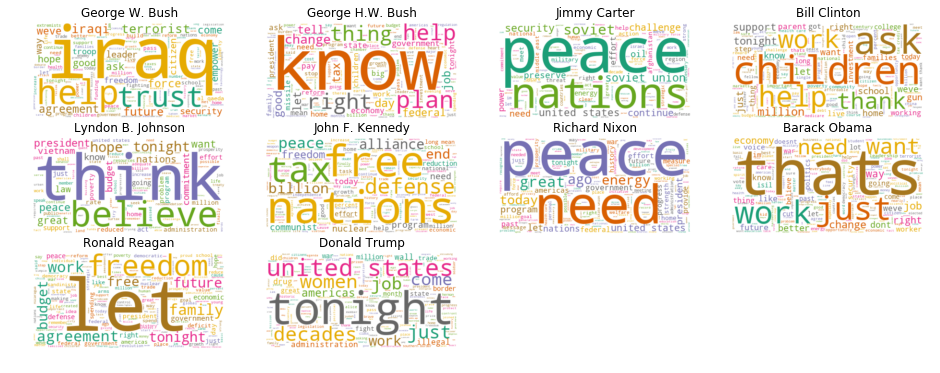

In [9]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['George W. Bush', 'George H.W. Bush', 'Jimmy Carter', 'Bill Clinton', 'Lyndon B. Johnson', 'John F. Kennedy', 'Richard Nixon', 'Barack Obama', 'Ronald Reagan', 'Donald Trump']
run_times = [53, 52, 33, 90, 44, 45, 44, 61, 44, 52]

# Create subplots for each president
for index, president in enumerate(data.columns):
    wc.generate(data_clean.transcript[president])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [10]:
# Find the number of unique words that each president uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for president in data.columns:
    uniques = data[president].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, run_times, unique_list)), columns=['president', 'speech_time', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,president,speech_time,unique_words
2,Jimmy Carter,33,822
4,Lyndon B. Johnson,44,950
6,Richard Nixon,44,968
8,Ronald Reagan,44,1159
1,George H.W. Bush,52,1170
7,Barack Obama,61,1377
5,John F. Kennedy,45,1387
9,Donald Trump,52,1393
0,George W. Bush,53,1395
3,Bill Clinton,90,1679


In [11]:
# Calculate the words per minute of each president

# Find the total number of words that a president uses
total_list = []
for president in data.columns:
    totals = sum(data[president])
    total_list.append(totals)
    
# # Speech length in minutes
# run_times = [53, 52, 33, 90, 44, 45, 44, 61, 44, 52]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,president,speech_time,unique_words,total_words,run_times,words_per_minute
1,George H.W. Bush,52,1170,2252,52,43.307692
7,Barack Obama,61,1377,2756,61,45.180328
3,Bill Clinton,90,1679,4252,90,47.244444
2,Jimmy Carter,33,822,1593,33,48.272727
9,Donald Trump,52,1393,2535,52,48.750000
6,Richard Nixon,44,968,2150,44,48.863636
8,Ronald Reagan,44,1159,2240,44,50.909091
0,George W. Bush,53,1395,2819,53,53.188679
5,John F. Kennedy,45,1387,2493,45,55.400000
4,Lyndon B. Johnson,44,950,3366,44,76.500000


In [35]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

#my_text = data_clean.transcript.loc['bushjunior']
data_df = pd.read_pickle('corpus.pkl')
my_text = data_df.transcript['obama']

def preprocess(sentence):
    sentence = nltk.word_tokenize(sentence)
    sentence = nltk.pos_tag(sentence)
    return sentence

result = preprocess(my_text)
result

#import spacy
#import en_core_web_sm

#my_text = data_clean.transcript.loc['bushjunior']
#nlp = spacy.load('en_core_web_sm')
#doc = nlp(my_text)

#for ent in doc.ents:
#    print(ent.text, ent.start_char, ent.end_char, ent.label_)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mette\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mette\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Mr.', 'NNP'),
 ('Speaker', 'NNP'),
 (',', ','),
 ('Mr.', 'NNP'),
 ('Vice', 'NNP'),
 ('President', 'NNP'),
 (',', ','),
 ('Members', 'NNP'),
 ('of', 'IN'),
 ('Congress', 'NNP'),
 (',', ','),
 ('my', 'PRP$'),
 ('fellow', 'JJ'),
 ('Americans', 'NNPS'),
 (':', ':'),
 ('Tonight', 'NN'),
 ('marks', 'VBZ'),
 ('the', 'DT'),
 ('eighth', 'JJ'),
 ('year', 'NN'),
 ('that', 'IN'),
 ('I', 'PRP'),
 ('’', 'VBP'),
 ('ve', 'JJ'),
 ('come', 'NN'),
 ('here', 'RB'),
 ('to', 'TO'),
 ('report', 'VB'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('State', 'NNP'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Union', 'NNP'),
 ('.', '.'),
 ('And', 'CC'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('final', 'JJ'),
 ('one', 'CD'),
 (',', ','),
 ('I', 'PRP'),
 ('’', 'VBP'),
 ('m', 'RB'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('try', 'VB'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('it', 'PRP'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('shorter', 'NN'),
 ('.', '.'),
 ('(', '('),
 ('Applause', 'NNP'),
 ('.', '.'),
 (')', ')'),
 ('I', 'PRP'),
 ('know', 'VBP'),
 (